<a href="https://colab.research.google.com/github/konaken73/ALC4phase1challenge/blob/master/Quantifying_the_Impact_of_Geopolitical_Risk%2C_Trade_War%2C_And_Environmental_Shock_on_Global_Financial_And_Commodity_Markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi
!pip install yfinance

In [ ]:
# import library
import pandas as pd
import numpy as np
import yfinance as yf
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your actual FRED API key
key='e80b732c271369c1e3f4cf7d5b967bfc'
fred = Fred(api_key=key)

## Data Gathering

In [ ]:
#Get The S&P 500, short for the Standard & Poor's 500, (SP500) series daily
##finData = fred.get_series('SP500')

finData = yf.download('^GSPC',start='1990-01-01', end='2024-12-31')['Close']

# Print the first few rows of the data
print(finData.head())

[*********************100%***********************]  1 of 1 completed

Ticker           ^GSPC
Date                  
1990-01-02  359.690002
1990-01-03  358.760010
1990-01-04  355.670013
1990-01-05  352.200012
1990-01-08  353.790009


In [ ]:
# Get the Global price of WTI Crude (POILWTIUSDM) series Monthly
CommoMKtdata = fred.get_series('POILWTIUSDM')

# Print the first few rows of the data
print(CommoMKtdata.head())

1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
dtype: float64


In [ ]:
gprddf=pd.read_excel('data_gpr_daily_recent.xls')
gprddf.tail()

,DAY,N10D,GPRD,GPRD_ACT,GPRD_THREAT,date,GPRD_MA30,GPRD_MA7,event,var_name,var_label
14654,20250214,529,131.500793,112.368027,135.382034,2025-02-14,126.696411,117.757797,NaN,NaN,NaN
14655,20250215,506,130.931534,130.528503,108.873665,2025-02-15,127.961319,115.682007,NaN,NaN,NaN
14656,20250216,424,101.564575,109.040565,103.943542,2025-02-16,128.397385,130.191238,NaN,NaN,NaN
14657,20250217,372,178.095047,177.546844,222.137390,2025-02-17,131.758011,137.432465,NaN,NaN,NaN
14658,20250218,416,214.998383,206.398209,225.127716,2025-02-18,136.356750,148.909775,NaN,NaN,NaN


In [ ]:
"""This dataset includes the World Uncertainty Index (WUI) at the global level, as well as by income, region, and country levels. It also includes the World Trade Uncertainty Index (WTUI) at the global and country level. And it also includes the charts for WUI global and WTUI global with each of the spikes labeled. This is a quarterly dataset. """
wuidf=pd.read_excel('WUI_Data.xlsx',sheet_name='T1')
wuidf.tail()

,Year,Global (simple average),Global (GDP weighted average),Advanced economies,Emerging economies,Low-income economies,Africa,Asia and the Pacific,Europe,Middle East and Central Asia,Western Hemisphere
136,2024q1,16396.19,16042.91,19472.06,10094.24,14015.27,23638.03,4135.177,15067.20,9582.871,28248.07
137,2024q2,14389.50,15096.69,17271.58,11399.55,12644.94,25132.38,4528.362,16117.94,10356.000,23887.81
138,2024q3,16702.59,19263.25,23033.10,12398.54,22038.00,27130.37,7115.786,24794.08,10431.200,26126.76
139,2024q4,23229.74,26370.25,30832.16,17751.51,37256.34,37695.16,11828.220,33563.66,15883.790,33944.99
140,2025q1,31213.94,48145.70,60877.88,26034.53,40990.59,46324.70,22948.540,42431.81,14347.800,81192.51


<AxesSubplot:>

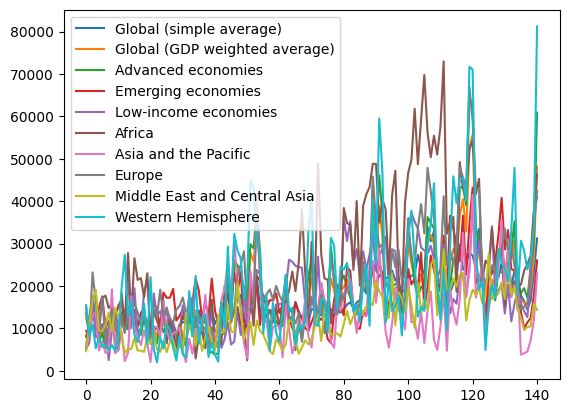

In [ ]:
wuidf.plot()

In [ ]:
"""Trade Policy Uncertainty (Caldara, Iacoviello, Molligo, Prestipino, and Raffo)"""
tpudf=pd.read_excel('tpu_web_latest.xlsx',sheet_name='TPU_MONTHLY')

tpudf.head()

,DATE,N7,TPU_RAW,TPU_SHARE,TPU
0,1960-01-01,40817,74,0.001813,18.129701
1,1960-02-01,37415,43,0.001149,11.492717
2,1960-03-01,41378,63,0.001523,15.225482
3,1960-04-01,40450,73,0.001805,18.046972
4,1960-05-01,42316,75,0.001772,17.723792


In [ ]:
#The Gavriilidis, K. (2021) dataset. Measuring Climate Policy Uncertainty. Available at SSRN: https://ssrn.com/abstract=3847388
CUIdf=pd.read_csv('CPU index.csv')
CUIdf

,date,cpu_index,old_cpu_index
0,Apr-87,43.589069,NaN
1,May-87,41.862022,NaN
2,Jun-87,71.135203,NaN
3,Jul-87,53.756704,NaN
4,Aug-87,60.615545,NaN
...,...,...,...
451,Nov-24,422.186810,NaN
452,Dec-24,293.329612,NaN
453,Jan-25,387.540863,NaN
454,Feb-25,461.030037,NaN


## Data Preprocessing

let us clean our data. Here we are going to remove some column data and also rows which contains missing data.Transform daily data to monthly data.

In [ ]:
# here we prepare necessaries method

def daily_to_monthly(daily_data, aggregation_method='mean'):
    """
    Converts daily time series data to monthly data using a specified aggregation method.

    Args:
        daily_data (pd.Series or pd.DataFrame): Daily time series data with a DatetimeIndex.
        aggregation_method (str): Method to aggregate daily data to monthly.
                                   Options: 'mean', 'sum', 'min', 'max', 'first', 'last'.
                                   Defaults to 'mean'.

    Returns:
        pd.Series or pd.DataFrame: Monthly time series data. Returns None if input
                                     is not a Pandas Series or DataFrame with a DatetimeIndex.
    """
    if not isinstance(daily_data, (pd.Series, pd.DataFrame)):
        print("Error: Input must be a Pandas Series or DataFrame.")
        return None

    if not isinstance(daily_data.index, pd.DatetimeIndex):
        print("Error: Input must have a DatetimeIndex.")
        return None

    # Create a monthly DatetimeIndex from the daily index
    monthly_index = daily_data.index.to_period('M')

    if isinstance(daily_data, pd.Series):
        if aggregation_method == 'mean':
            monthly_data = daily_data.groupby(monthly_index).mean()
        elif aggregation_method == 'sum':
            monthly_data = daily_data.groupby(monthly_index).sum()
        elif aggregation_method == 'min':
            monthly_data = daily_data.groupby(monthly_index).min()
        elif aggregation_method == 'max':
            monthly_data = daily_data.groupby(monthly_index).max()
        elif aggregation_method == 'first':
            monthly_data = daily_data.groupby(monthly_index).first()
        elif aggregation_method == 'last':
            monthly_data = daily_data.groupby(monthly_index).last()
        else:
            print(f"Error: Aggregation method '{aggregation_method}' not supported for Series.")
            return None
    elif isinstance(daily_data, pd.DataFrame):
        if aggregation_method == 'mean':
            monthly_data = daily_data.groupby(monthly_index).mean()
        elif aggregation_method == 'sum':
            monthly_data = daily_data.groupby(monthly_index).sum()
        elif aggregation_method == 'min':
            monthly_data = daily_data.groupby(monthly_index).min()
        elif aggregation_method == 'max':
            monthly_data = daily_data.groupby(monthly_index).max()
        elif aggregation_method == 'first':
            monthly_data = daily_data.groupby(monthly_index).first()
        elif aggregation_method == 'last':
            monthly_data = daily_data.groupby(monthly_index).last()
        else:
            print(f"Error: Aggregation method '{aggregation_method}' not supported for DataFrame.")
            return None

    return monthly_data

#### convert daily data to monthly

In [ ]:
# daily financial data to monthly financial data

finDataM=daily_to_monthly(finData)
finDataM.head()

NameError: name 'daily_to_monthly' is not defined

<AxesSubplot:>

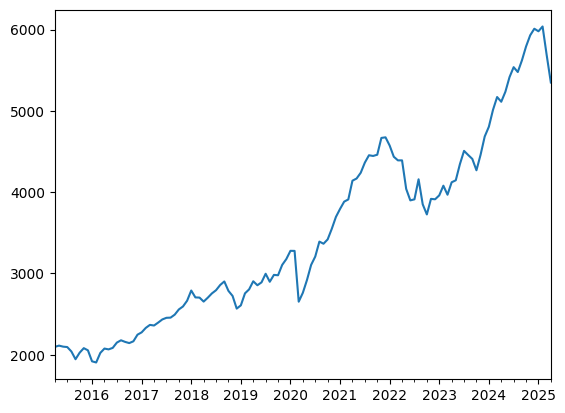

In [ ]:
finDataM.plot()

In [ ]:
#daily GPR
gprdf=gprddf[['date','GPRD','GPRD_ACT','GPRD_THREAT']]
event=gprddf[['date','event']]
gprdf.set_index('date',inplace=True)
#gprdf=daily_to_monthly(gprdf)
gprdf.head()

,GPRD,GPRD_ACT,GPRD_THREAT
date,,,
1985-01-01,230.039429,275.197601,153.027985
1985-01-02,115.676971,146.772064,87.444572
1985-01-03,97.428459,158.937653,29.459934
1985-01-04,157.366638,156.882248,157.026352
1985-01-05,81.361313,92.698143,77.319405


In [ ]:
event.dropna()

,date,event
470,1986-04-16,U.S. Bombing of Libya
2205,1991-01-15,Gulf War - Operation Desert Storm
6119,2001-10-03,U.S. Invades Afghanistan
6464,2002-09-13,Bush Seeks UN Approval for Iraq War; Putin Th...
6618,2003-02-14,War Fears U.S./Iraq; Terrorism in UK; Tension...
6653,2003-03-21,Beginning of the Iraq War
7154,2004-08-03,Terrorist Threats in New York and Washington
7493,2005-07-08,London Bombings 7/7
11277,2015-11-17,Paris Terrorist Attacks
12789,2020-01-07,U.S. / Iran Tensions Escalate


In [ ]:
eventd=event.dropna()
for row in eventd.iterrows():
    print(row[0])

470
2205
6119
6464
6618
6653
7154
7493
11277
12789
13569


"\nfor row in eventd.iterrows():\n    #print(row[1][1])\n    plt.annotate(row[1][1], xy=(gprdf.index[row[0]], gprdf['GPRD'][row[0]]), xytext=(pd.to_datetime(row[1][0]), 18),\n             arrowprops=dict(facecolor='black',arrowstyle='fancy'),\n             fontsize=8)\n\n# Show the plot\nplt.tight_layout()\nplt.show()\n"

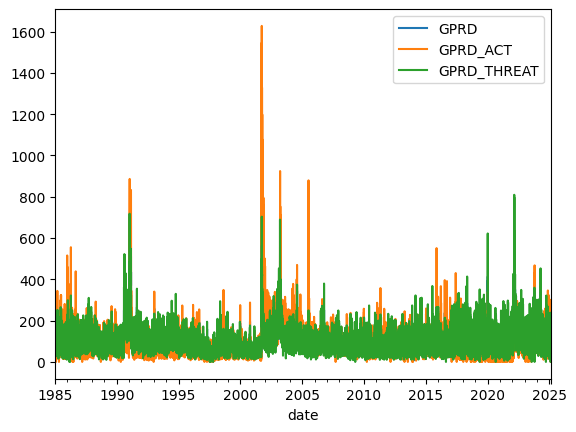

In [ ]:
gprdf.plot()
# Adding text with an arrow
"""
for row in eventd.iterrows():
    #print(row[1][1])
    plt.annotate(row[1][1], xy=(gprdf.index[row[0]], gprdf['GPRD'][row[0]]), xytext=(pd.to_datetime(row[1][0]), 18),
             arrowprops=dict(facecolor='black',arrowstyle='fancy'),
             fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()
"""

#### reformat the data structure and get relevant info

In [ ]:
# Climate Uncertainty index data reformat

CUIdf.set_index('date',inplace=True)
CUIdfM=CUIdf['cpu_index']

<AxesSubplot:xlabel='date'>

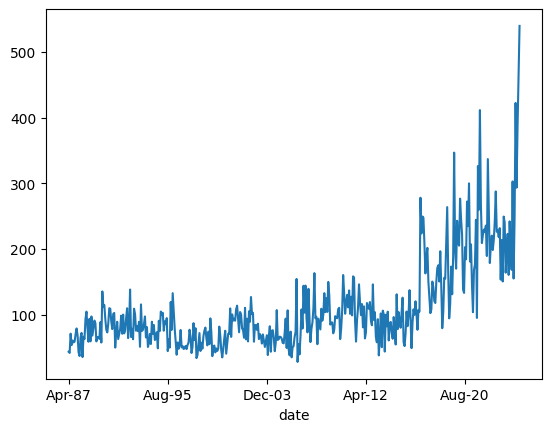

In [ ]:
CUIdfM.plot()

In [ ]:
# Trade Policy Uncertainty index data reformat

tpudf.rename(columns={"DATE":"date"},inplace=True)
tpudf.set_index('date',inplace=True)
tpudfM=tpudf['TPU']
tpudfM.head()

date
1960-01-01    18.129701
1960-02-01    11.492717
1960-03-01    15.225482
1960-04-01    18.046972
1960-05-01    17.723792
Name: TPU, dtype: float64

<AxesSubplot:xlabel='date'>

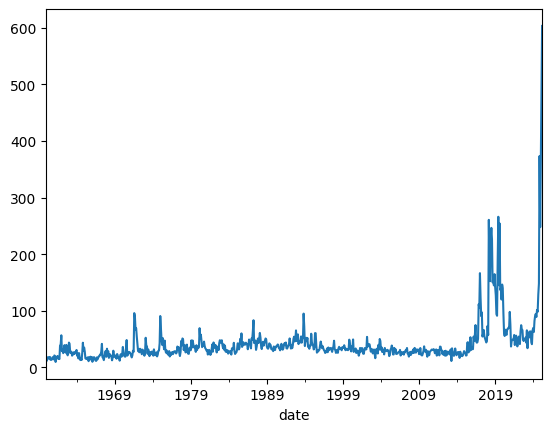

In [ ]:
tpudfM.plot()

<AxesSubplot:>

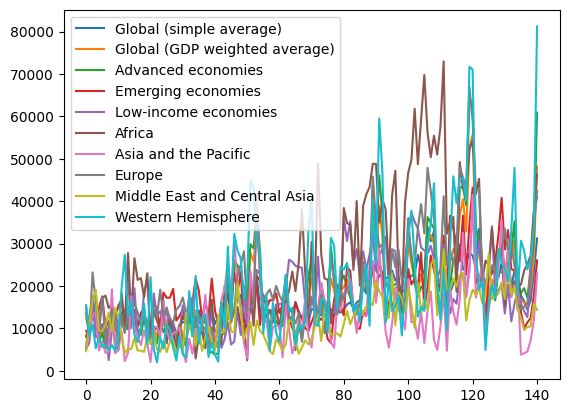

In [ ]:
# world Uncertainty index data reformat
wuidf.plot()

In [ ]:
import yfinance as yf

def get_sp500_data(start_date, end_date):
    """
    Fetches historical data for the S&P 500 from Yahoo Finance for a given date range.

    Args:
        start_date (str): The start date for the data retrieval in 'YYYY-MM-DD' format.
        end_date (str): The end date for the data retrieval in 'YYYY-MM-DD' format.

    Returns:
        pandas.DataFrame: A DataFrame containing the historical data for the S&P 500,
                          or None if an error occurs.  The DataFrame is indexed by date.
                          The columns include: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'.
    """
    try:
        # Ticker symbol for S&P 500 is "^GSPC"
        sp500 = yf.Ticker("^GSPC")

        # Fetch the historical data
        data = sp500.history(start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error fetching S&P 500 data: {e}")
        return None

if __name__ == '__main__':
    # Specify the date range
    start_date = "1990-01-01"
    end_date = "2024-12-31"

    # Get the S&P 500 data
    sp500_data = get_sp500_data(start_date, end_date)

    # Print the data if it was successfully retrieved
    if sp500_data is not None:
        print(sp500_data)

        # You can also save it to a CSV file:
        # sp500_data.to_csv("sp500_data.csv")


^GSPC: No data found for this date range, symbol may be delisted
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [ ]:
import yfinance as yf
import pandas as pd

def get_sp500_data(start_date, end_date):
    """
    Fetches historical data for the S&P 500 from Yahoo Finance for a given date range.

    Args:
        start_date (str): The start date for the data retrieval in 'YYYY-MM-DD' format.
        end_date (str): The end date for the data retrieval in 'YYYY-MM-DD' format.

    Returns:
        pandas.DataFrame: A DataFrame containing the historical data for the S&P 500,
                          or None if an error occurs.  The DataFrame is indexed by date.
                          The columns include: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'.
    """
    try:
        # Ticker symbol for S&P 500 is "^GSPC"
        sp500 = yf.Ticker("^GSPC")

        # Fetch the historical data
        data = sp500.history(start=start_date, end=end_date)

        if data.empty:
            print(f"No data found for S&P 500 between {start_date} and {end_date}.  Check the date range and symbol.")
            return None

        return data
    except Exception as e:
        print(f"Error fetching S&P 500 data: {e}")
        return None

if __name__ == '__main__':
    # Specify the date range
    start_date = "1990-01-01"
    end_date = "2024-12-31"

    # Get the S&P 500 data
    sp500_data = get_sp500_data(start_date, end_date)

    # Print the data if it was successfully retrieved
    if sp500_data is not None:
        print(sp500_data)

        # You can also save it to a CSV file:
        sp500_data.to_csv("sp500_data.csv")



^GSPC: No data found for this date range, symbol may be delisted
No data found for S&P 500 between 1990-01-01 and 2024-12-31.  Check the date range and symbol.
